In [210]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [211]:
df = pd.read_csv('C:/Users/kabee/OneDrive/Desktop/DS_PROJECT/notebook/data/Obesity Estimation.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [212]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [213]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [214]:
df.shape

(2111, 17)

In [215]:
import pandas as pd

metadata = {
    "Gender": "Gender",
    "Age": "Age",
    "Height": "Height",
    "Weight": "Weight",
    "family_history_with_overweight": "Has a family member suffered or suffers from overweight?",
    "FAVC": "Do you eat high caloric food frequently?",
    "FCVC": "Do you usually eat vegetables in your meals?",
    "NCP": "How many main meals do you have daily?",
    "CAEC": "Do you eat any food between meals?",
    "SMOKE": "Do you smoke?",
    "CH2O": "How much water do you drink daily?",
    "SCC": "Do you monitor the calories you eat daily?",
    "FAF": "How often do you have physical activity?",
    "TUE": "How much time do you use technological devices such as cell phone, videogames, television, computer and others?",
    "CALC": "How often do you drink alcohol?",
    "MTRANS": "Which transportation do you usually use?",
    "NObeyesdad": "Obesity level"
}

metadata_series = pd.Series(metadata, name="Description")
metadata_df = metadata_series.reset_index()
metadata_df.columns = ["Variable Name", "Description"]
pd.set_option('display.max_colwidth', None)
print(metadata_df)


                     Variable Name  \
0                           Gender   
1                              Age   
2                           Height   
3                           Weight   
4   family_history_with_overweight   
5                             FAVC   
6                             FCVC   
7                              NCP   
8                             CAEC   
9                            SMOKE   
10                            CH2O   
11                             SCC   
12                             FAF   
13                             TUE   
14                            CALC   
15                          MTRANS   
16                      NObeyesdad   

                                                                                                        Description  
0                                                                                                            Gender  
1                                                                              

In [216]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))


categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

for features in categorical_features:
    print(features, " - ", df[features].unique())

We have 8 numerical features : ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

We have 9 categorical features : ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Gender  -  ['Female' 'Male']
family_history_with_overweight  -  ['yes' 'no']
FAVC  -  ['no' 'yes']
CAEC  -  ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE  -  ['no' 'yes']
SCC  -  ['no' 'yes']
CALC  -  ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS  -  ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad  -  ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [217]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [218]:
import pandas as pd 
def BMI(weight, height):
    bmi = weight / (height**2)

    ranges = ['0 - 18.5', '18.5 - 24.9', '25 - 27.45', '27/45 - 29.9', '30 - 34.9', '35 - 39.5', '40 - 1000000']
    levels = ['UNDERWEIGHT', 'NORMAL', 'OVERWEIGHT CLASS-1', 'OVERWEIGHT CLASS-2', 'OBESITY CLASS-1', 'OBESITY CLASS-2', 'OBESITY CLASS-3']
    ob = pd.DataFrame({'Range': ranges, 'Level': levels})

    for i, r in enumerate(ranges):
        if bmi < float(r.split(" - ")[1]):
            return bmi
    
df['BMI'] = df.apply(lambda row: BMI(row['Weight'], row['Height']), axis=1)
df



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [219]:
X = df.drop(columns=['BMI'],axis=1)
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [220]:
y = df['BMI']
y

0       24.386526
1       24.238227
2       23.765432
3       26.851852
4       28.342381
          ...    
2106    44.901475
2107    43.741923
2108    43.543817
2109    44.071535
2110    44.144338
Name: BMI, Length: 2111, dtype: float64

In [221]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)
X = preprocessor.fit_transform(X)


In [222]:
X.shape

(2111, 38)

In [223]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1688, 38), (423, 38))

In [224]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [225]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.5643
- Mean Absolute Error: 0.4272
- R2 Score: 0.9950
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5963
- Mean Absolute Error: 0.4498
- R2 Score: 0.9946


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.1016
- Mean Absolute Error: 1.7122
- R2 Score: 0.9306
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.1416
- Mean Absolute Error: 1.7328
- R2 Score: 0.9306


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.5621
- Mean Absolute Error: 0.4249
- R2 Score: 0.9950
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5916
- Mean Absolute Error: 0.4475
- R2 Score: 0.9947


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.0995
- Mean Absolute Error: 0.6517
- R2 Score: 0.9810
-----------------------

In [226]:
pd.DataFrame(list(zip(model_list, r2_list)), 
             columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.997813
6,XGBRegressor,0.996623
5,Random Forest Regressor,0.996074
2,Ridge,0.994702
0,Linear Regression,0.994618
4,Decision Tree,0.993604
8,AdaBoost Regressor,0.977398
3,K-Neighbors Regressor,0.967108
1,Lasso,0.930567


In [227]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.46


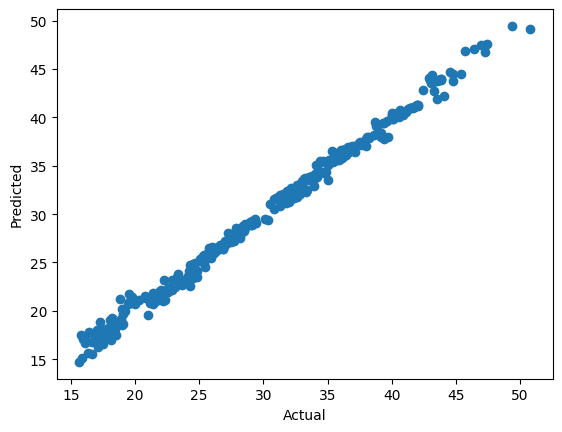

In [228]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

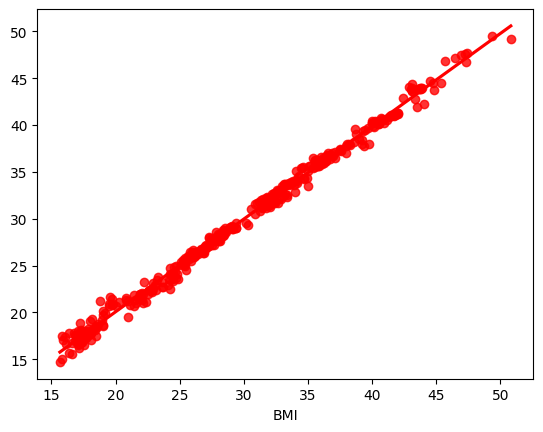

In [229]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [230]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
544,17.415366,16.882812,0.532553
1987,42.039953,41.250000,0.789953
420,17.531045,16.515625,1.015420
527,18.178670,19.273438,-1.094767
196,24.163265,23.562500,0.600765
...,...,...,...
447,26.851852,26.742188,0.109664
1793,37.141638,36.460938,0.680701
73,18.991965,18.523438,0.468527
1711,36.699383,36.765625,-0.066242


In [231]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [232]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Identify categorical and numerical columns
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

# Preprocessing pipeline for numerical data: scaling
numerical_transformer = StandardScaler()

# Preprocessing pipeline for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(drop='first')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy} %')

print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# For binary classification ROC-AUC score (adjust if you have multi-class)
if len(df['NObeyesdad'].unique()) == 2:
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f'ROC-AUC Score: {roc_auc}')


Accuracy: 98.81796690307328 %
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        56
      Normal_Weight       0.95      0.98      0.97        62
     Obesity_Type_I       1.00      1.00      1.00        78
    Obesity_Type_II       1.00      1.00      1.00        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.98      0.95      0.96        56
Overweight_Level_II       0.98      1.00      0.99        50

           accuracy                           0.99       423
          macro avg       0.99      0.99      0.99       423
       weighted avg       0.99      0.99      0.99       423

Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 0 61  0  0  0  1  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 53  1]
 [ 0  0  0  0  0  0 50]]


In [233]:
feature_importances = pipeline.named_steps['model'].feature_importances_
feature_names = preprocessor.transformers_[0][2] + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols))
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False))


                               Feature  Importance
8                                  BMI    0.340362
2                               Weight    0.200885
0                                  Age    0.064582
3                                 FCVC    0.059392
1                               Height    0.057721
9                          Gender_Male    0.048636
4                                  NCP    0.033966
5                                 CH2O    0.029757
7                                  TUE    0.028655
6                                  FAF    0.027026
10  family_history_with_overweight_yes    0.020908
13                      CAEC_Sometimes    0.014750
18                      CALC_Sometimes    0.014434
19                             CALC_no    0.013032
12                     CAEC_Frequently    0.012160
11                            FAVC_yes    0.009732
22        MTRANS_Public_Transportation    0.009526
14                             CAEC_no    0.003644
16                             

In [234]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define feature matrix and target vector
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Identify categorical and numerical columns
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

# Preprocessing pipeline for numerical data: scaling
numerical_transformer = StandardScaler()

# Preprocessing pipeline for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(drop='first')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the pipeline with preprocessing and SVM model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC(probability=True))
])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_svc = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_svc)*100
print(f'Accuracy: {accuracy} %')


# Evaluation metrics
print(classification_report(y_test, y_pred_svc))



Accuracy: 94.56264775413712 %
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.98      0.96        56
      Normal_Weight       0.88      0.84      0.86        62
     Obesity_Type_I       0.97      0.97      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.85      0.89      0.87        56
Overweight_Level_II       1.00      0.94      0.97        50

           accuracy                           0.95       423
          macro avg       0.95      0.94      0.94       423
       weighted avg       0.95      0.95      0.95       423



In [235]:
from sklearn.metrics import log_loss
y_prob = pipeline.predict_proba(X_test)
logloss = log_loss(y_test, y_prob)
print(f'Log Loss: {logloss}')


Log Loss: 0.12942159501963132


In [236]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred_svc)
print(f'Matthews Correlation Coefficient: {mcc}')


Matthews Correlation Coefficient: 0.9364656850059733


Accuracy: 0.9456264775413712
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.98      0.96        56
      Normal_Weight       0.88      0.84      0.86        62
     Obesity_Type_I       0.97      0.97      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.85      0.89      0.87        56
Overweight_Level_II       1.00      0.94      0.97        50

           accuracy                           0.95       423
          macro avg       0.95      0.94      0.94       423
       weighted avg       0.95      0.95      0.95       423



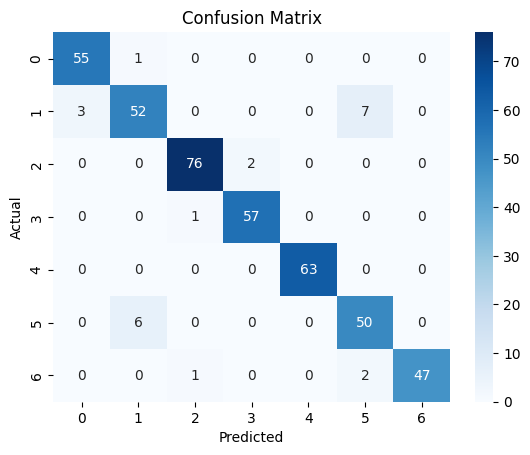

Log Loss: 0.13190861625624614


c:\USERS\KABEE\ONEDRIVE\DESKTOP\DS_PROJECT\VENV\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Cross-Validation Accuracy Scores: [0.8392435  0.98104265 0.9549763  0.96919431 0.99052133]
Mean CV Accuracy: 0.9469956191948729


In [237]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, log_loss, matthews_corrcoef, cohen_kappa_score, accuracy_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset

# Define feature matrix and target vector
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Identify categorical and numerical columns
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

# Preprocessing pipeline for numerical data: scaling
numerical_transformer = StandardScaler()

# Preprocessing pipeline for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the pipeline with preprocessing and SVM model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC(probability=True, random_state=42))
])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_svc = pipeline.predict(X_test)
y_prob_svc = pipeline.predict_proba(X_test)

# Evaluation metrics
# Accuracy
accuracy = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy: {accuracy}')

# Classification Report
print(classification_report(y_test, y_pred_svc))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC (for binary classification)
if len(y.unique()) == 2:
    y_prob = y_prob_svc[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    print(f'ROC AUC Score: {auc}')

    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

# Precision-Recall Curve (for binary classification)
if len(y.unique()) == 2:
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Log Loss
logloss = log_loss(y_test, y_prob_svc)
print(f'Log Loss: {logloss}')

# Matthews Correlation Coefficient (MCC)
#mcc = matthews_corrcoef(y_test, y_pred_svc)
#print(f'Matthews Correlation Coefficient: {mcc}')

# Cohen’s Kappa
#kappa = cohen_kappa_score(y_test, y_pred_svc)
#print(f"Cohen's Kappa: {kappa}")

# Cross-Validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')
